<a href="https://colab.research.google.com/github/Archana-2024/Task2-Predictive-Analysis-using-machine-learning/blob/main/Predictive_Analysis_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Data Analysis for Retail Banking

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes


In [ ]:
df['default'].replace(['yes','no'],[1,0],inplace=True)
df['housing'].replace(['yes','no'],[1,0],inplace=True)
df['loan'].replace(['yes','no'],[1,0],inplace=True)
df['deposit'].replace(['yes','no'],[1,0],inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [ ]:
df=df.rename(columns={'default':'defaulter','previous':'prev'})

In [ ]:
df["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
import types
import pandas as pd
!pip install botocore ibm-cos-sdk

from botocore.client import Config
import ibm_boto3


def __iter__(self): return 0

In [ ]:
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

In [ ]:
correlation_matrix

,age,defaulter,balance,housing,loan,day,duration,campaign,pdays,prev,deposit
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
defaulter,-0.011425,1.000000,-0.060954,0.011076,0.076434,0.017342,-0.009760,0.030975,-0.036282,-0.035273,-0.040680
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,-0.014770,0.035051,0.006660,0.064497,-0.000840,-0.203888
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,0.017269,-0.001914,0.034722,-0.030416,-0.022668,-0.110580
day,-0.000762,0.017342,0.010467,-0.014770,0.017269,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,-0.036282,0.017411,0.064497,-0.030416,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
prev,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867


# Exploratory Data Analysis(EDA)

Text(0.5, 1.0, 'Distribution of Balance')

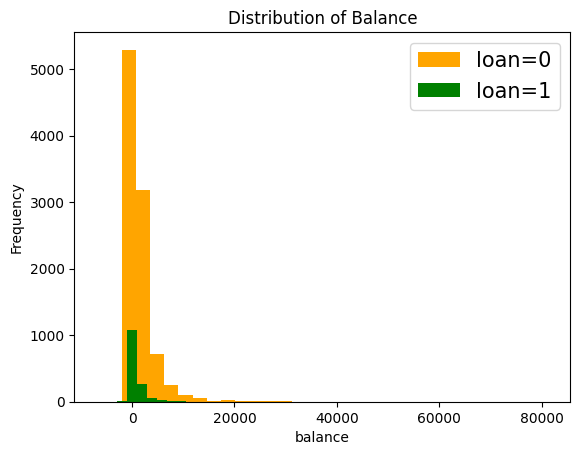

In [ ]:
df[df['loan']==0]['balance'].plot.hist(bins=30,color='orange', label='loan=0')
df[df['loan']==1]['balance'].plot.hist(bins=30, color='green', label='loan=1')
plt.legend(fontsize=15)
plt.xlabel("balance")
plt.title('Distribution of Balance')

Text(0.5, 0, 'age')

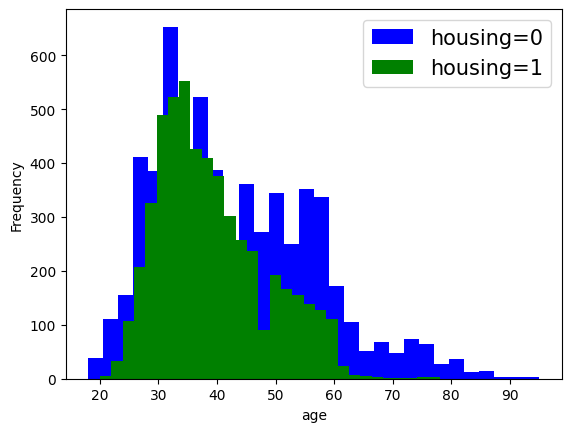

In [ ]:
df[df['housing']==0]['age'].plot.hist(bins=30,color='blue', label='housing=0')
df[df['housing']==1]['age'].plot.hist(bins=30, color='green', label='housing=1')
plt.legend(fontsize=15)
plt.xlabel("age")

Text(0.5, 0, 'age')

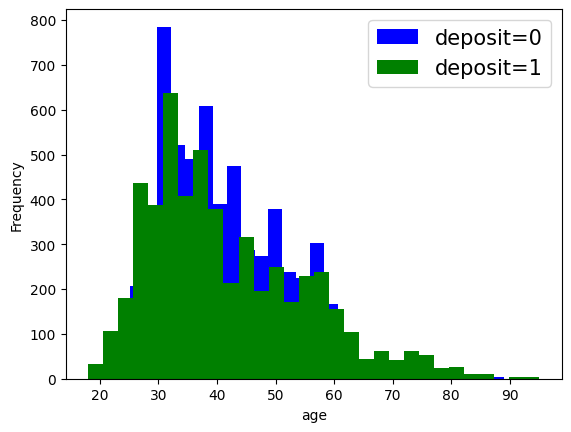

In [ ]:
df[df['deposit']==0]['age'].plot.hist(bins=30,color='blue', label='deposit=0')
df[df['deposit']==1]['age'].plot.hist(bins=30, color='green', label='deposit=1')
plt.legend(fontsize=15)
plt.xlabel("age")

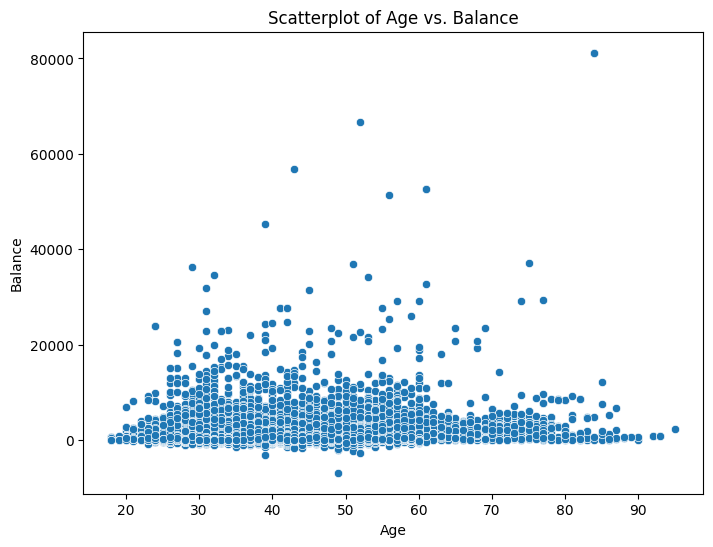

In [ ]:
# prompt: scatterplot of age and balance

plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='balance', data=df)
plt.title('Scatterplot of Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


<Axes: >

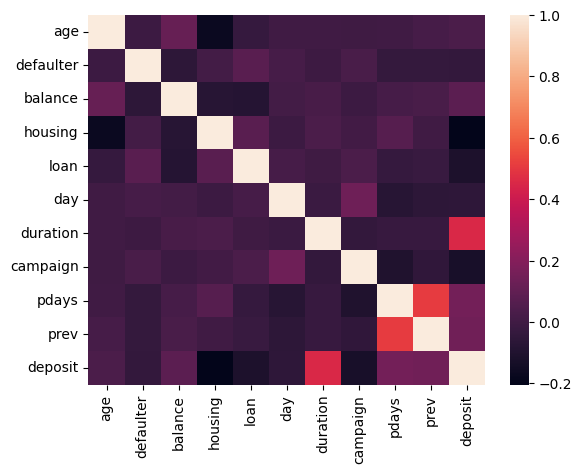

In [ ]:


sns.heatmap(correlation_matrix)


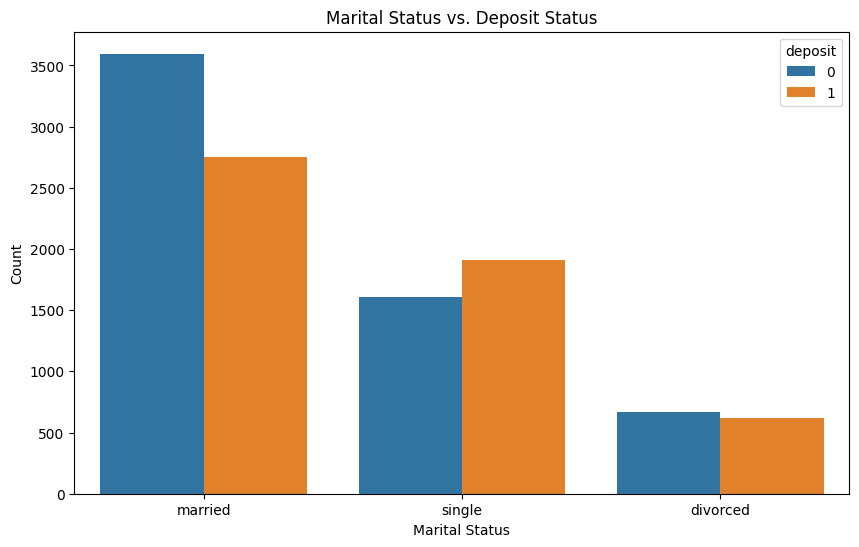

In [ ]:
# prompt: Bar chart of Marial status colored by deposit status

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='deposit', data=df)
plt.title('Marital Status vs. Deposit Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


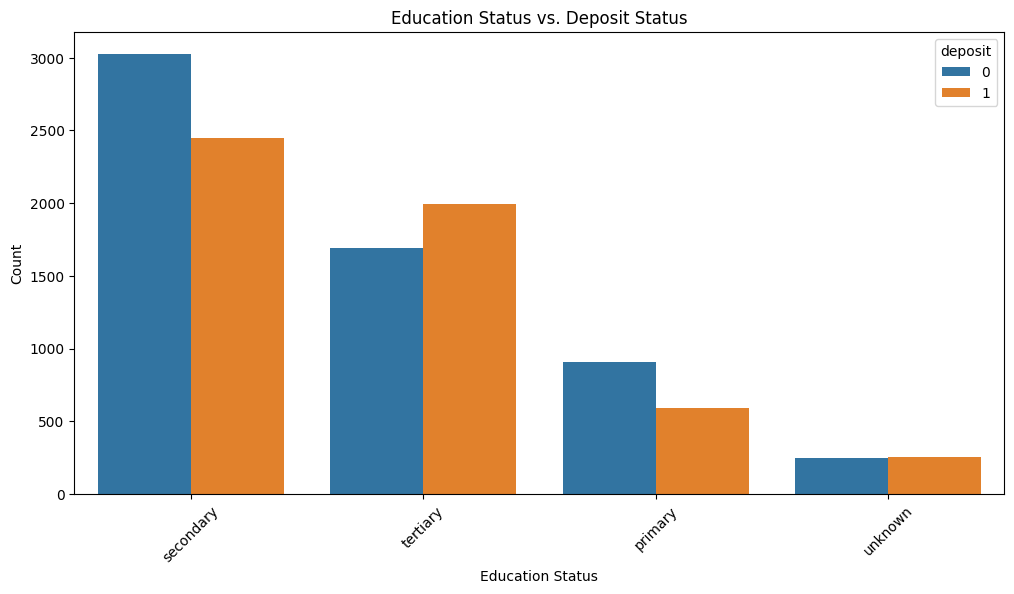

In [ ]:
# prompt: horizontal chart of education status colored by deposit status"

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='deposit', data=df)
plt.title('Education Status vs. Deposit Status')
plt.xlabel('Education Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


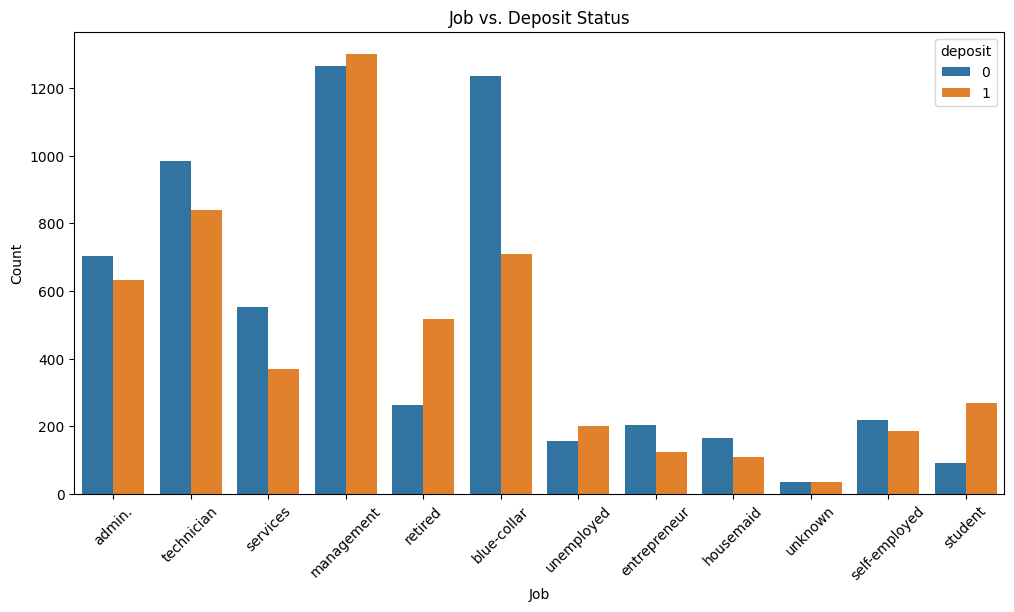

In [ ]:
# prompt: countplot of job and deposit count

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='deposit', data=df)
plt.title('Job vs. Deposit Status')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Text(0, 0.5, 'duration')

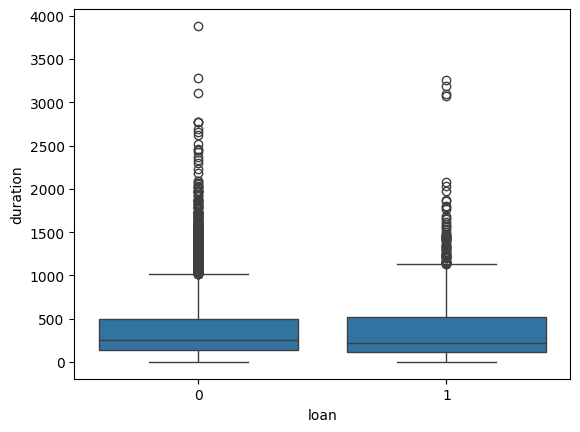

In [ ]:
sns.boxplot(x=df['loan'],y=df['duration'])
plt.xlabel('loan')
plt.ylabel('duration')


In [ ]:
df["pdays"].replace(-1,int(0),inplace=True)
df.head()

,age,job,marital,education,defaulter,balance,housing,loan,contact,day,month,duration,campaign,pdays,prev,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,0,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,0,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,0,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,0,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,0,0,unknown,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.iloc[:,1]=le.fit_transform(df.iloc[:,1])
df.iloc[:,2]=le.fit_transform(df.iloc[:,2])
df.iloc[:,3]=le.fit_transform(df.iloc[:,3])
df.iloc[:,8]=le.fit_transform(df.iloc[:,8])
df.iloc[:,10]=le.fit_transform(df.iloc[:,10])
df.iloc[:,15]=le.fit_transform(df.iloc[:,15])
df

,age,job,marital,education,defaulter,balance,housing,loan,contact,day,month,duration,campaign,pdays,prev,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,0,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,0,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,0,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,0,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,0,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,0,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,0,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [ ]:

X=df.drop(columns=["day","deposit"])
Y=df["deposit"]

In [ ]:
X

,age,job,marital,education,defaulter,balance,housing,loan,contact,month,duration,campaign,pdays,prev,poutcome
0,59,0,1,1,0,2343,1,0,2,8,1042,1,0,0,3
1,56,0,1,1,0,45,0,0,2,8,1467,1,0,0,3
2,41,9,1,1,0,1270,1,0,2,8,1389,1,0,0,3
3,55,7,1,1,0,2476,1,0,2,8,579,1,0,0,3
4,54,0,1,2,0,184,0,0,2,8,673,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,0,257,1,0,0,3
11158,39,7,1,1,0,733,0,0,2,6,83,4,0,0,3
11159,32,9,2,1,0,29,0,0,0,1,156,2,0,0,3
11160,43,9,1,1,0,0,0,1,0,8,9,2,172,5,0


# **Preprocessing the data**

In [ ]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(X).transform(X)

array([[0.53246753, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.49350649, 0.        , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.2987013 , 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.18181818, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32467532, 0.81818182, 0.5       , ..., 0.20140515, 0.0862069 ,
        0.        ],
       [0.20779221, 0.81818182, 0.5       , ..., 0.        , 0.        ,
        1.        ]])

# **Train Test Split**

In [ ]:
#Splitting the dataset into Training set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train

,age,job,marital,education,defaulter,balance,housing,loan,contact,month,duration,campaign,pdays,prev,poutcome
3244,26,0,2,2,0,2532,1,1,0,3,269,1,0,0,3
8358,59,2,1,0,0,124,1,0,0,9,531,3,134,7,0
4378,38,4,1,2,0,385,1,0,1,10,154,1,0,0,3
4062,52,4,1,1,0,335,0,0,0,10,411,1,182,1,0
2791,55,10,0,1,0,309,0,0,0,10,467,2,184,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,33,0,1,2,0,882,0,0,0,0,104,1,183,4,0
8237,36,4,1,2,0,0,1,0,0,4,86,1,237,17,1
3263,20,8,2,1,0,215,0,0,0,3,175,1,92,6,2
4900,35,4,1,2,0,2161,0,0,0,11,569,3,0,0,3


In [ ]:
Y_train

,deposit
3244,1
8358,0
4378,1
4062,1
2791,1
...,...
1600,1
8237,0
3263,1
4900,1


In [ ]:
X_test

,age,job,marital,education,defaulter,balance,housing,loan,contact,month,duration,campaign,pdays,prev,poutcome
8687,60,4,1,2,0,79,0,0,2,6,48,3,0,0,3
2608,29,9,2,1,0,590,0,0,0,1,81,1,94,1,2
4163,24,8,2,1,0,8165,0,0,0,11,216,1,0,0,3
2495,41,4,1,2,0,27696,0,0,0,1,147,2,104,1,0
7806,45,1,0,1,0,756,1,0,2,8,179,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,45,1,0,0,0,-311,1,0,2,8,1030,1,0,0,3
2327,49,4,1,2,0,561,0,0,0,6,173,1,0,0,3
5854,51,4,1,2,0,-3,0,0,0,1,79,2,0,0,3
10478,33,4,2,2,0,307,0,0,0,5,113,6,179,4,0


In [ ]:
Y_test

,deposit
8687,0
2608,1
4163,1
2495,1
7806,0
...,...
128,1
2327,1
5854,0
10478,0


# **KNN classifier**

In [ ]:
#Fitting Classifier to the Training set
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred=clf.predict(X_test)

In [ ]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[0 1 0 ... 0 1 0]


In [ ]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[0 1 0 ... 0 1 0]


In [ ]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

knn_acc=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))



Accuracy score: 73.354232
Recall score : 71.598174
ROC score : 73.321055

[[854 284]
 [311 784]]


In [ ]:

#Predict the probability of each test data point
#Get the probability distribution
probas = clf.predict_proba(X_test)

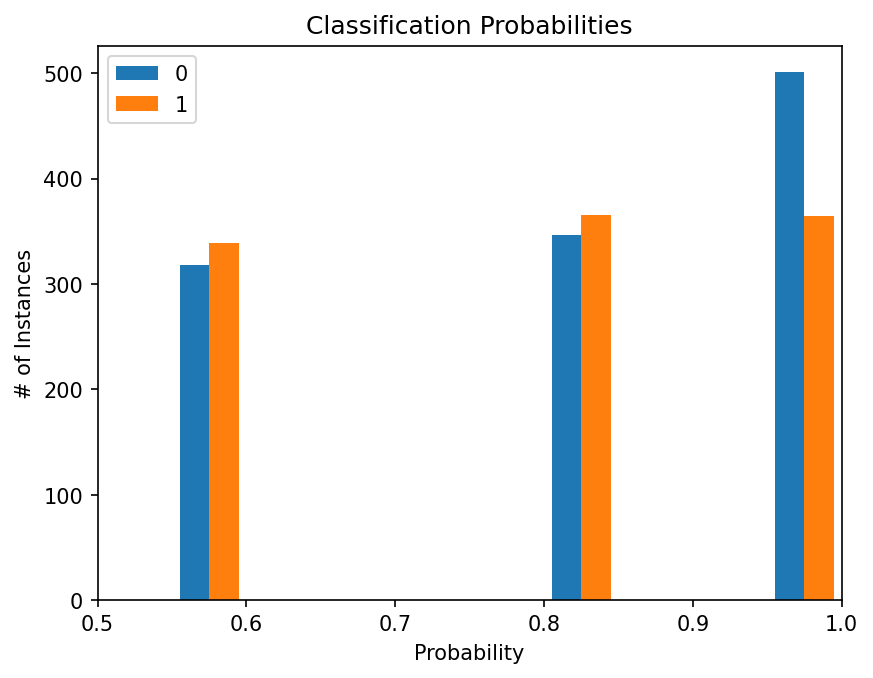

In [ ]:
#Visualize the probabilities
# plot
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(Y_test)
plt.show()

In [ ]:
X_train_std = minmax.fit_transform(X_train)
X_test_std = minmax.transform(X_test)
#Evaluation Metrics
from sklearn.model_selection import cross_val_score,cross_val_predict
#Print cross validation score for kNN
clf_acc = cross_val_score(clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
clf_proba = cross_val_predict(clf, X_train_std, Y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1] # get the score of the positive class
clf_acc

array([0.73899899, 0.72547043, 0.72614247])

## **Logistic Regression**

In [ ]:
#Build a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr_acc = cross_val_score(lr, X_train_std, Y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, X_train_std, Y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]
lr_acc

array([0.79140074, 0.79670699, 0.7859543 ])

In [ ]:
#Predict on test data
Y_pred=lr.predict(X_test)
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 1 ... 0 0 1]


In [ ]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[0 0 0 ... 0 0 0]


In [ ]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_lr=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))


Accuracy score: 76.489028
Recall score : 71.780822
ROC score : 76.400077

[[922 216]
 [309 786]]


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

# **Decision Tree**


In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train,Y_train)

#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, X_train_std, Y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]
dtc_clf_acc

array([0.75613033, 0.76444892, 0.76008065])

In [ ]:
#Predict on test data
Y_pred=dtc_clf.predict(X_test)
print('Actual Deposit ')
print(Y_test.values)


Actual Deposit 
[0 1 1 ... 0 0 1]


In [ ]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[0 0 1 ... 0 0 1]


In [ ]:

#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_rmf=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))


Accuracy score: 76.757725
Recall score : 76.073059
ROC score : 76.744790

[[881 257]
 [262 833]]


In [ ]:
dtc_clf_acc

array([0.75613033, 0.76444892, 0.76008065])

# **Random Forest**


In [ ]:
#Build Random Forest Calssifier
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=2, random_state=0)
rmf_clf = rmf.fit(X_train, Y_train)
#Print cross validation score for Random Forest Calssifier
rmf_clf_acc = cross_val_score(rmf_clf, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, X_train_std, Y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]
rmf_clf_acc

array([0.77292576, 0.76377688, 0.74865591])

In [ ]:
#Predict on test data
Y_pred=rmf.predict(X_test)

In [ ]:
print('Actual Deposit ')
print(Y_test.values)

Actual Deposit 
[0 1 1 ... 0 0 1]


In [ ]:
print('Predicted Deposit')
print(Y_pred)

Predicted Deposit
[0 1 0 ... 0 1 0]


In [ ]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_rmf=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))


Accuracy score: 75.996417
Recall score : 69.954338
ROC score : 75.882266

[[931 207]
 [329 766]]


In [ ]:
acc_rmf


75.99641737572772

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))

    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

# **svm**


In [ ]:
# Build Support Vector Classification
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(X_train,Y_train)

In [ ]:
#Print cross validation score for SVC
svc_acc = cross_val_score(svc_classifier, X_train_std, Y_train, cv=3, scoring="accuracy",  n_jobs=-1)
svc_proba = cross_val_predict(svc_classifier, X_train_std, Y_train, cv=3, method='predict_proba')
svc_scores = svc_proba[:, 1]

In [ ]:
svc_acc

array([0.79979845, 0.79939516, 0.80040323])

In [ ]:
print('Actual deposit')
print(Y_test.values)

Actual deposit
[0 1 1 ... 0 0 1]


In [ ]:
print('Predicted deposit')
print(Y_pred)

Predicted deposit
[0 1 0 ... 0 1 0]


In [ ]:
#Accuracy score on Test and Train
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_svm=accuracy_score(Y_test,Y_pred) * 100
print("\nAccuracy score: %f" %(accuracy_score(Y_test,Y_pred) * 100))
print("Recall score : %f" %(recall_score(Y_test, Y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(Y_test, Y_pred) * 100))
print(confusion_matrix(Y_test, Y_pred))


Accuracy score: 75.996417
Recall score : 69.954338
ROC score : 75.882266

[[931 207]
 [329 766]]


AUC Score (kNN): 0.80 


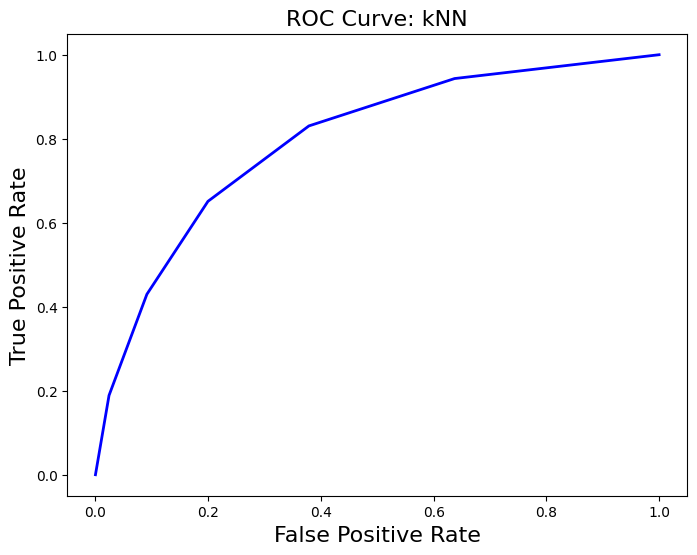

AUC Score (Logistic Regression): 0.86 


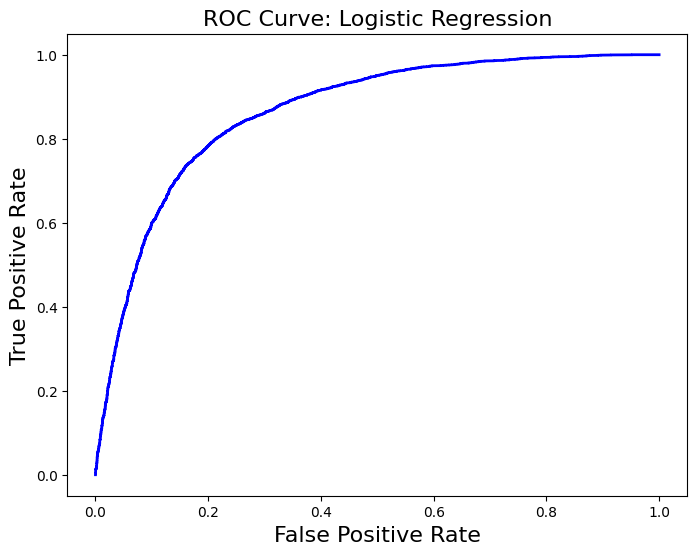

AUC Score (Support Vector Classification): 0.88 


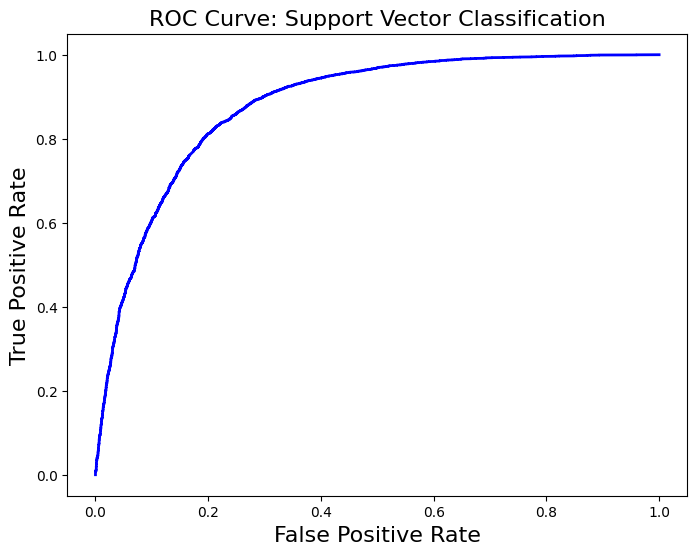

AUC Score (Decision Tree Classifier): 0.76 


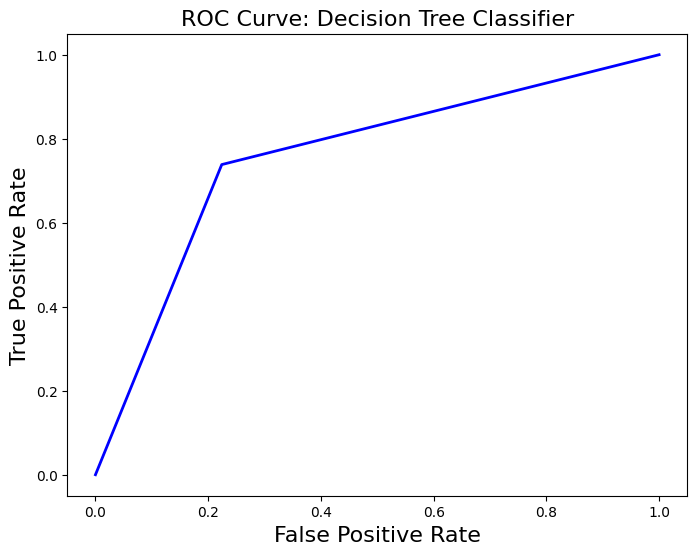

AUC Score (Random Forest Classifier): 0.85 


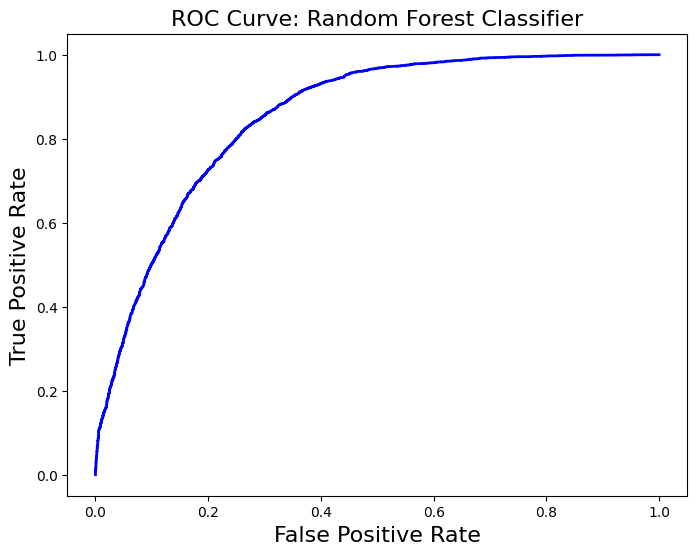

In [ ]:
#Plot ROC Curve for each algorithm
ROC_curve('kNN', Y_train, clf_scores)
ROC_curve('Logistic Regression', Y_train, lr_scores)
ROC_curve('Support Vector Classification',Y_train,svc_scores)
ROC_curve('Decision Tree Classifier',Y_train,dtc_clf_scores)
ROC_curve('Random Forest Classifier',Y_train,rmf_clf_scores)